In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# Dependencies
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
from pprint import pprint
from datetime import datetime

import json
from datetime import date
import calendar


In [2]:
def ward_data(lat, lng):
    latsqr = lat*lat
    lngsqr = lng*lng
    return [latsqr, lngsqr]

In [3]:
ret=ward_data(43.34343,-35.4343)
ret[1]

1255.58961649

In [4]:
""#Import data from poilce API
base_url="https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/MCI_2014_to_2018/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"

# set up lists to hold response data for name and rating
lat=[]
lon=[]
mci=[]
neighbourhood=[]
occurrencedate=[]
occurrenceday=[]
occurrencehour=[]
occurrencemonth=[]
occurrenceyear=[]
offence=[]
premisetype=[]
reporteddate=[]
reportedday=[]
reporteddayofweek=[]
reporteddayofyear=[]
reportedhour=[]
reportedmonth=[]
reportedyear= []
wardnumber=[]
wardname=[]
response = requests.get(base_url).json()

#pprint(requests.get(base_url).json())
for i in response["features"]:
   
    mci.append(i["attributes"]["MCI"])
    lat.append(i["attributes"]["Lat"])
    lon.append(i["attributes"]["Long"])
    neighbourhood.append(i["attributes"]["Neighbourhood"])
    occurrencedate.append(i["attributes"]["occurrencedate"])
    occurrenceday.append(i["attributes"]["occurrenceday"])
    occurrencehour.append(i["attributes"]["occurrencehour"])
    occurrencemonth.append(i["attributes"]["occurrencemonth"])
    occurrenceyear.append(i["attributes"]["occurrenceyear"])
    offence.append(i["attributes"]["offence"])
    premisetype.append(i["attributes"]["premisetype"])
    reporteddate.append(i["attributes"]["reporteddate"])
    reportedday.append(i["attributes"]["reportedday"])
    reporteddayofweek.append(i["attributes"]["reporteddayofweek"])
    reporteddayofyear.append(i["attributes"]["reporteddayofyear"])
    reportedhour.append(i["attributes"]["reportedhour"])
    reportedmonth.append(i["attributes"]["reportedmonth"])
    reportedyear.append(i["attributes"]["reportedyear"])
    warddata = ward_data(i["attributes"]["Lat"],i["attributes"]["Long"])
    wardnumber.append(warddata[0])
    wardname.append(warddata[1])
# Create the dict from the arrays
mci_dict = {
    "lat": lat,
    "lon": lon,
    "mci": mci,
   "neighbourhood":neighbourhood,
    "occurrencedate":occurrencedate,
    "occurrenceday":occurrenceday,
    "occurrencehour":occurrencehour,
    "occurrencemonth":occurrencemonth,
    "occurrenceyear":occurrenceyear,
    "offence":offence,
    "premisetype":premisetype,
    "reporteddate":reporteddate,
    "reportedday":reportedday,
    "reporteddayofweek":reporteddayofweek,
    "reporteddayofyear":reporteddayofyear,
    "reportedhour":reportedhour,
    "reportedmonth":reportedmonth,
    "reportedyear":reportedyear,
    "wardNumber":wardnumber,
    "wardname":wardname
}
mci_df=pd.DataFrame(mci_dict)

mci_df


,lat,lon,mci,neighbourhood,occurrencedate,occurrenceday,occurrencehour,occurrencemonth,occurrenceyear,offence,premisetype,reporteddate,reportedday,reporteddayofweek,reporteddayofyear,reportedhour,reportedmonth,reportedyear,wardNumber,wardname
0,43.668449,-79.343094,Robbery,North Riverdale (68),1398338940000,24.0,11,April,2014.0,Robbery - Mugging,Commercial,1398343560000,24,Thursday,114,12,April,2014,1906.933473,6295.326550
1,43.759285,-79.507927,Break and Enter,Black Creek (24),1398344400000,24.0,13,April,2014.0,B&E,House,1398355080000,24,Thursday,114,15,April,2014,1914.875024,6321.510440
2,43.697552,-79.501663,Assault,Brookhaven-Amesbury (30),1398432000000,25.0,13,April,2014.0,Assault,Apartment,1398433920000,25,Friday,115,13,April,2014,1909.476025,6320.514452
3,43.721703,-79.571510,Assault,Rexdale-Kipling (4),1398358800000,24.0,17,April,2014.0,Assault,Outside,1398421800000,25,Friday,115,10,April,2014,1911.587278,6331.625251
4,43.663891,-79.503487,Assault,Lambton Baby Point (114),1398441600000,25.0,16,April,2014.0,Assault,Apartment,1398442500000,25,Friday,115,16,April,2014,1906.535360,6320.804382
5,43.657307,-79.373459,Assault,Moss Park (73),1398465000000,25.0,22,April,2014.0,Assault,Apartment,1398465720000,25,Friday,115,22,April,2014,1905.960428,6300.145978
6,43.666363,-79.316605,Assault,Woodbine Corridor (64),1399081560000,3.0,1,May,2014.0,Assault,Outside,1399088520000,3,Saturday,123,3,May,2014,1906.751240,6291.123765
7,43.658112,-79.402023,Assault,University (79),1399092240000,3.0,4,May,2014.0,Assault With Weapon,Outside,1399092240000,3,Saturday,123,4,May,2014,1906.030708,6304.681304
8,43.658112,-79.402023,Assault,University (79),1399092240000,3.0,4,May,2014.0,Assault With Weapon,Outside,1399092240000,3,Saturday,123,4,May,2014,1906.030708,6304.681304
9,43.658112,-79.402023,Assault,University (79),1399092240000,3.0,4,May,2014.0,Assault With Weapon,Outside,1399092240000,3,Saturday,123,4,May,2014,1906.030708,6304.681304


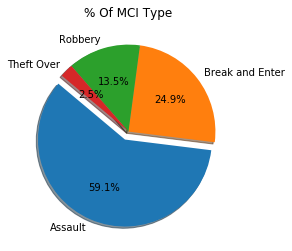

In [5]:
# Plot map for MCI
mci_df["mci"].value_counts()

x=mci_df.groupby(['mci'])["mci"].agg([("Total_crime","count")])

x=x.reset_index(None)


explode = (0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

pieplt=plt.pie(x['Total_crime'],explode=explode,labels=x['mci'],autopct="%.1f%%",\
               shadow=True,startangle=140)

plt.title("% Of MCI Type")
plt.grid()
#plt.savefig('pyber_Total_Fare_By_CityType.png')
plt.show()


In [6]:
# Looking only at strikers (ST) to start
#mci_df["occurencedate_Readable"]=(pd.to_datetime(mci_df["occurrencedate"],unit='ms')) 
#mci_df['day_of_week'] = mci_df['occurencedate_Readable'].dt.weekday_name

mci=input("Enter the MCI type ")
reported_by = input ("Enter the what you want to analyse the data based on\n1:Based on Occurance day of Week\n2:Based on hour of Day\n3:Based on month of year\n")
#mci_df_fil = mci_df.loc[mci_df["mci"] == mci, :]
#mci_df_fil

Enter the MCI type sadsa
Enter the what you want to analyse the data based on
1:Based on Occurance day of Week
2:Based on hour of Day
3:Based on month of year
asas


In [7]:
mci_df

,lat,lon,mci,neighbourhood,occurrencedate,occurrenceday,occurrencehour,occurrencemonth,occurrenceyear,offence,premisetype,reporteddate,reportedday,reporteddayofweek,reporteddayofyear,reportedhour,reportedmonth,reportedyear,wardNumber,wardname
0,43.668449,-79.343094,Robbery,North Riverdale (68),1398338940000,24.0,11,April,2014.0,Robbery - Mugging,Commercial,1398343560000,24,Thursday,114,12,April,2014,1906.933473,6295.326550
1,43.759285,-79.507927,Break and Enter,Black Creek (24),1398344400000,24.0,13,April,2014.0,B&E,House,1398355080000,24,Thursday,114,15,April,2014,1914.875024,6321.510440
2,43.697552,-79.501663,Assault,Brookhaven-Amesbury (30),1398432000000,25.0,13,April,2014.0,Assault,Apartment,1398433920000,25,Friday,115,13,April,2014,1909.476025,6320.514452
3,43.721703,-79.571510,Assault,Rexdale-Kipling (4),1398358800000,24.0,17,April,2014.0,Assault,Outside,1398421800000,25,Friday,115,10,April,2014,1911.587278,6331.625251
4,43.663891,-79.503487,Assault,Lambton Baby Point (114),1398441600000,25.0,16,April,2014.0,Assault,Apartment,1398442500000,25,Friday,115,16,April,2014,1906.535360,6320.804382
5,43.657307,-79.373459,Assault,Moss Park (73),1398465000000,25.0,22,April,2014.0,Assault,Apartment,1398465720000,25,Friday,115,22,April,2014,1905.960428,6300.145978
6,43.666363,-79.316605,Assault,Woodbine Corridor (64),1399081560000,3.0,1,May,2014.0,Assault,Outside,1399088520000,3,Saturday,123,3,May,2014,1906.751240,6291.123765
7,43.658112,-79.402023,Assault,University (79),1399092240000,3.0,4,May,2014.0,Assault With Weapon,Outside,1399092240000,3,Saturday,123,4,May,2014,1906.030708,6304.681304
8,43.658112,-79.402023,Assault,University (79),1399092240000,3.0,4,May,2014.0,Assault With Weapon,Outside,1399092240000,3,Saturday,123,4,May,2014,1906.030708,6304.681304
9,43.658112,-79.402023,Assault,University (79),1399092240000,3.0,4,May,2014.0,Assault With Weapon,Outside,1399092240000,3,Saturday,123,4,May,2014,1906.030708,6304.681304
